In [1]:
import os
import tensorflow as tf
import glob
import numpy as np
import h5py
import matplotlib.pyplot as plt
from models import Generator
from transforms import load_train_image,load_test_image

In [2]:
TRAIN_DIR = '../data/nyudepthv2/train/'
TEST_DIR  = '../data/nyudepthv2/val/'

#Loading Data
tr_urls = [f for f in glob.glob(TRAIN_DIR + "**/*.h5", recursive=True)]
ts_urls = [f for f in glob.glob(TEST_DIR + "**/*.h5", recursive=True)]

In [3]:
train_dataset = tf.data.Dataset.from_tensor_slices(tr_urls)
train_dataset = train_dataset.map(lambda tr_urls: tf.py_function(func=load_train_image, inp=[tr_urls], Tout=[tf.uint8, tf.float32])  )
train_dataset = train_dataset.batch(8)

In [4]:
test_dataset = tf.data.Dataset.from_tensor_slices(ts_urls)
test_dataset = test_dataset.map(lambda ts_urls: tf.py_function(func=load_test_image, inp=[ts_urls], Tout=[tf.uint8, tf.float32])  )
test_dataset = test_dataset.batch(1)

# Build the Generator

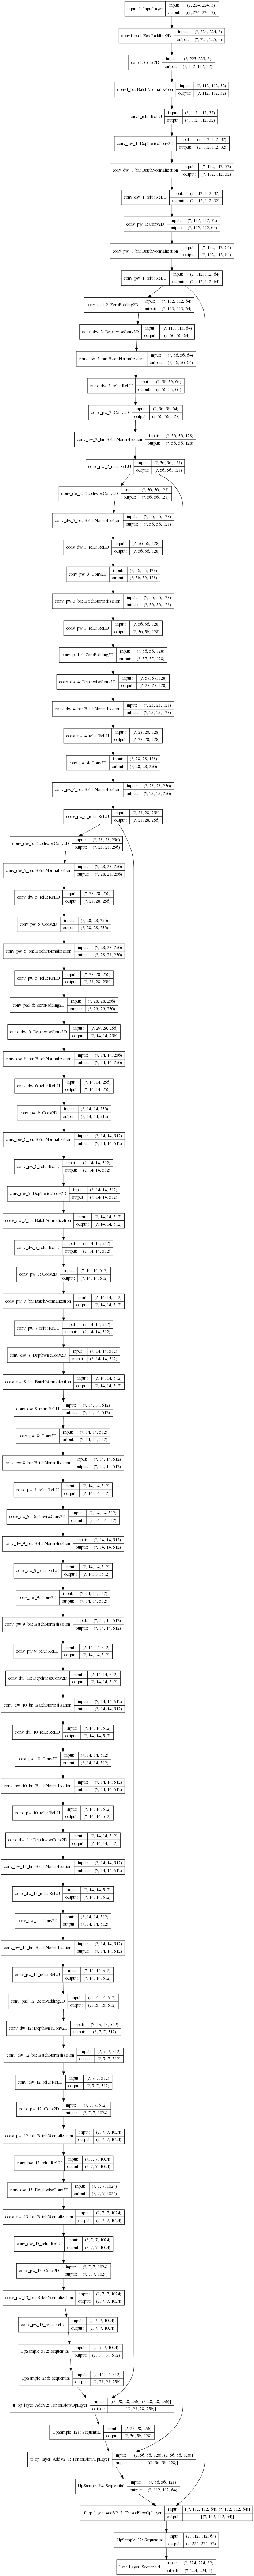

In [5]:
Model = Generator()
tf.keras.utils.plot_model(Model, show_shapes=True, dpi=64)

# Training 

The trainig was based on [Ma and Karaman](https://arxiv.org/pdf/1709.07492.pdf) work

- **Loss Function**: They choose L1 error like the loss function
- **Optimizer**: The optimizer was SGD

In [6]:
optim = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [7]:
loss_func = tf.keras.losses.MeanAbsoluteError()

In [8]:
eval_metrics=[tf.keras.metrics.MeanAbsoluteError()]

In [9]:
Model.compile(
  optimizer= optim,
  loss= loss_func,
  metrics= eval_metrics
);

In [10]:
checkpoint_path = "./training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

./training_1


In [ ]:
#Train the model for 5 epochs.

Model.fit(train_dataset,  
          epochs=100,
          validation_data=test_dataset,
          callbacks=[cp_callback])


Epoch 1/100
1161/5948 [====>.........................] - ETA: 2:57:16 - loss: 0.9757 - mean_absolute_error: 0.9757

In [ ]:
# Create a basic model instance
model2 = Generator()
model2.compile(
  optimizer= optim,
  loss= loss_func,
  metrics= eval_metrics
);
# Evaluate the model
loss, acc = model2.evaluate(test_dataset, verbose=2)


In [ ]:
model2.load_weights(checkpoint_path)

# Re-evaluate the model
loss,acc = model2.evaluate(test_dataset, verbose=2)